In [1]:
import pyranha
import numpy as np
%matplotlib inline

First generate a few simple fisher matrices and compare on a triangle plot

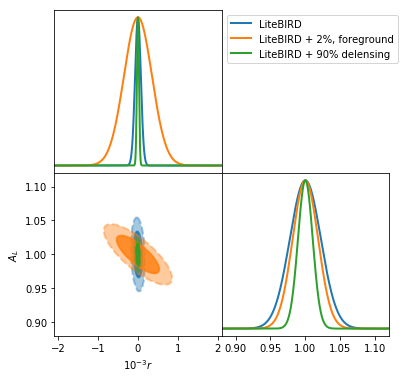

In [2]:
# Read in configuration file
pyr = pyranha.Pyranha("configurations/example.py")

# Compute instrument and cosmological spectra.
pyr.compute_instrument()
pyr.compute_cosmology()

# Compute single fisher matrix for this setup.
fisher = pyr.fisher()

# Now change some specific parmaeters and recompute the fisher matrix.
pyr.delensing = True
pyr.delensing_factor = 0.1
fisher_lens = pyr.fisher()

# Again change some parameters!
pyr.map_res = 0.02
pyr.compute_instrument()
fisher_fgnd = pyr.fisher()

# Overlay the three cases we have computed on a triangle plot to compare.
pyranha.plot_fisher_corner([fisher, fisher_fgnd, fisher_lens], [r'LiteBIRD', r'LiteBIRD + 2%, foreground', r'LiteBIRD + 90% delensing'], opath='plots/triangle.pdf')

Now we can iterate over one of the instrumental parameters, keeping the cosmological parameters fixed, which is relatively quick. In this case we iterate over the sky fraction observed. 

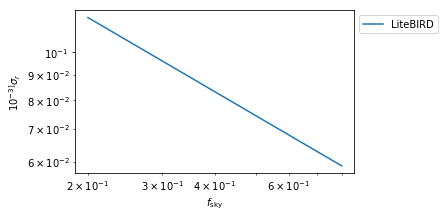

In [3]:
pyr = pyranha.Pyranha("configurations/example.py")

xarr = np.linspace(0.2, 0.8, 20)
fishers = pyr.iterate_instrument_parameter_1d('fsky', xarr)
pyranha.plot_fisher_1d(xarr, [fishers], ['LiteBIRD'], xlabel=r'$f_{\rm sky}$')    

Finally, we can iterate over two parameters together to create a contour plot of sigma_r.

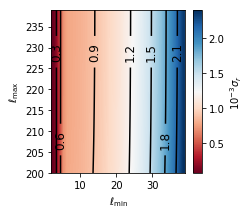

In [4]:
pyr = pyranha.Pyranha("configurations/example.py")

xarr = np.arange(2, 40)
yarr = np.arange(200, 240)
fishers2d = pyr.iterate_instrument_parameter_2d('lmin', 'lmax', xarr, yarr)
pyranha.plot_fisher_2d(xarr, yarr, fishers2d, xlabel=r'$\ell_{\rm min}$', ylabel=r'$\ell_{\rm max}$', opath="plots/lmin_lmax.pdf")

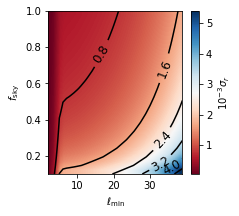

In [8]:
pyr = pyranha.Pyranha("configurations/example.py")

xarr = np.arange(2, 40)
yarr = np.linspace(0.1, 1., 20)
fishers2d = pyr.iterate_instrument_parameter_2d('lmin', 'fsky', xarr, yarr)
pyranha.plot_fisher_2d(xarr, yarr, fishers2d, xlabel=r'$\ell_{\rm min}$', ylabel=r'$f_{\rm sky}$', opath="plots/lmin_fsky.pdf")

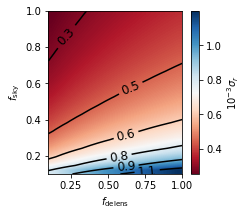

In [6]:
pyr = pyranha.Pyranha("configurations/example.py")
pyr.map_res = 0.02
xarr = np.linspace(0.1, 1., 20)
yarr = np.linspace(0.1, 1., 20)
fishers2d = pyr.iterate_instrument_parameter_2d('delensing_factor', 'fsky', xarr, yarr)
pyranha.plot_fisher_2d(xarr, yarr, fishers2d, xlabel=r'$f_{\rm delens}$', ylabel=r'$f_{\rm sky}$', opath="plots/delens_fsky.pdf")

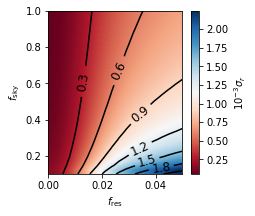

In [7]:
pyr = pyranha.Pyranha("configurations/example.py")

xarr = np.linspace(0., 0.05, 20)
yarr = np.linspace(0.1, 1., 20)
fishers2d = pyr.iterate_instrument_parameter_2d('map_res', 'fsky', xarr, yarr)
pyranha.plot_fisher_2d(xarr, yarr, fishers2d, xlabel=r'$f_{\rm res}$', ylabel=r'$f_{\rm sky}$', opath="plots/mapres_fsky.pdf")